In [13]:
!pip install typhoeus

ERROR: Could not find a version that satisfies the requirement typhoeus (from versions: none)
ERROR: No matching distribution found for typhoeus


In [14]:
!pip install tweepy


In [15]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context 

In [16]:
import tweepy
#import credentials
import requests
import pandas as pd
import re

In [17]:
#credentials

In [18]:
API_KEY= 'bKQ2GQktTAR9zNr0KrgvHZvlP'
API_SECRET_KEY= 'PmUHOQgmURFW4Ghj8rDjm1N8GcOkLRjFjA4n7GikSTx4hQL0qu'
BEARER_TOKER= 'AAAAAAAAAAAAAAAAAAAAALyXcwEAAAAADfa%2FRcICMzoQBpq5FU47C%2FcGWM4%3Dcf4Iwxjtej45CTrBjt4l429j5mgIoRGEtWWxpPgKX3T9OcTBqm'
ACCESS_TOKEN= '393398000-OhGazuIoWFKDNhn3uJaz6zZTSXOlw7Sw9fe4plKs'
ACCESS_TOKEN_SECRET= 'Ds85eGFYtrVlgF04FcfSl3s88aE9uNaswiWnYtoiHJN5c'

In [19]:
#credentials.ACCESS_TOKEN_SECRET

In [20]:
#auth = tweepy.OAuthHandler(credentials.API_KEY[0], credentials.API_SECRET_KEY)
#auth.set_access_token(credentials.ACCESS_TOKEN, credentials.ACCESS_TOKEN_SECRET)

#api = tweepy.API(auth)

In [21]:
import requests
import os
import json

# To set your environment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAALyXcwEAAAAADfa%2FRcICMzoQBpq5FU47C%2FcGWM4%3Dcf4Iwxjtej45CTrBjt4l429j5mgIoRGEtWWxpPgKX3T9OcTBqm'


def create_url():
    # Replace with user ID below
    user_id = 1162694149956603904
    return "https://api.twitter.com/2/users/{}/mentions".format(user_id)


def get_params():
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    return {"tweet.fields": "id,created_at,author_id,public_metrics",
            "max_results":100,
            "start_time":"2022-01-01T00:00:00Z",
            "expansions":"author_id"}


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2UserMentionsPython"
    return r


def connect_to_endpoint(url, params):
    response = requests.request("GET", url, auth=bearer_oauth, params=params)
    #print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


def main1():
    url = create_url()
    params = get_params()
    json_response = connect_to_endpoint(url, params)
    return(json_response)


if __name__ == "__main__":
    main1()

In [22]:
main1()

{'data': [{'text': 'Terminando el desafio de tripulaciones en @TheBridge_Tech',
   'created_at': '2022-05-23T11:18:42.000Z',
   'public_metrics': {'retweet_count': 0,
    'reply_count': 0,
    'like_count': 0,
    'quote_count': 0},
   'id': '1528696920729956352',
   'author_id': '1528649918306557952'},
  {'text': '"El libro de la inteligencia colectiva"  https://t.co/tUyIEoFlP9 artículo de @tiscar sobre la presentación que del libro de @arey haremos esta semana en @TheBridge_Tech \nPlazas limitadas, inscripciones en https://t.co/Oht7sRlBPh https://t.co/wICvbVbVqi',
   'created_at': '2022-05-23T08:15:36.000Z',
   'public_metrics': {'retweet_count': 3,
    'reply_count': 0,
    'like_count': 6,
    'quote_count': 0},
   'id': '1528650844094271490',
   'author_id': '41545659'},
  {'text': 'Este jueves nos vemos en @TheBridge_Tech para hablar sobre inteligencia colectiva a propósito del nuevo libro de @amaliorey y la compañía de @nodosenlared. En el blog avanzo algunos detalles: https://t

In [23]:
def obtener_fecha(i,parametro):
    sopa_limpia = i[parametro]
    pattern1 = re.compile(r'\d\d\d\d-\d\d-\d\d')
    match = re.search(pattern1, sopa_limpia)
    fecha = match.group(0)
    return fecha

In [24]:
def obtener_hora(i,parametro):
    sopa_limpia = i[parametro]
    pattern1 = re.compile(r'\d\d:\d\d:\d\d')
    match = re.search(pattern1, sopa_limpia)
    fecha = match.group(0)
    return fecha

In [25]:
text_list = []
fecha_list = []
hora_list = []
author_id = []
id_list = []
retweet = []
replies = []
likes = []
quotes = []

for i in main1()['data']:
    author_id.append((i['author_id']))
    # Sacar fecha y hora
    fecha = obtener_fecha(i,parametro='created_at')
    fecha_list.append(fecha)
    hora = obtener_hora(i,parametro='created_at')
    hora_list.append(hora)
    text_list.append((i['text']))
    id_list.append((i['id']))
    retweet.append(i['public_metrics']['retweet_count'])
    replies.append(i['public_metrics']['reply_count'])
    likes.append(i['public_metrics']['like_count'])
    quotes.append(i['public_metrics']['quote_count'])


    

In [26]:
Dataframe_twitter1 = pd.DataFrame(list(zip(author_id,fecha_list,hora_list,text_list,id_list,retweet,replies,likes,quotes)), columns=['Author_id','Fecha','Hora','Text','id_tweet','retweet','replies','likes','quotes'])
Dataframe_twitter1

,Author_id,Fecha,Hora,Text,id_tweet,retweet,replies,likes,quotes
0,1528649918306557952,2022-05-23,11:18:42,Terminando el desafio de tripulaciones en @The...,1528696920729956352,0,0,0,0
1,41545659,2022-05-23,08:15:36,"""El libro de la inteligencia colectiva"" https...",1528650844094271490,3,0,6,0
2,4628161,2022-05-23,08:01:09,Este jueves nos vemos en @TheBridge_Tech para ...,1528647207594909696,0,0,1,1
3,987388686,2022-05-23,07:38:11,Conoce las 25 ofertas de #empleo de la empresa...,1528641426975760389,3,0,7,0
4,15993641,2022-05-23,07:25:47,#LastMinute La 2da presentación del #LibroIC e...,1528638307516694529,2,0,4,1
...,...,...,...,...,...,...,...,...,...
95,12085582,2022-01-21,09:47:17,Hoy tenemos reto de tripulaciones @TheBridge_T...,1484462596065574914,0,0,1,0
96,1162694149956603904,2022-01-20,10:54:42,"Nuevo evento🤩""La Inteligencia Artificial y la ...",1484117172494475265,1,0,3,0
97,1162694149956603904,2022-01-19,16:20:41,El claustro de #DataScience de @TheBridge_Tech...,1483836824279818241,2,0,1,0
98,1162694149956603904,2022-01-18,16:02:13,Del periodismo al marketing digital 🤸 esta es ...,1483469787078533123,0,0,0,0


In [27]:
import time
id_user_list = []
namer_user_list = []
username_list = []


#print(main1()['includes']['users'])
for i in main1()['includes']['users']:
   id_user_list.append(i['id'])
   namer_user_list.append(i['name'])
   username_list.append(i['username'])



   #id_user_list.append((i['id']))
   #namer_user_list.append((i['name']))
   #username_list.append((i['username']))


In [28]:
Dataframe_user1 = pd.DataFrame(list(zip(id_user_list,namer_user_list,username_list)), columns=['Author_id','Author_name','Author_username'])
Dataframe_user1

,Author_id,Author_name,Author_username
0,1528649918306557952,Nacho Esteban,nachooatm82
1,41545659,Mario Lopez de Avila,nodosenlared
2,4628161,Tíscar Lara,tiscar
3,987388686,Juan Luis Pavón,juanluispavon1
4,15993641,Amalio A. Rey,arey
...,...,...,...
60,1961523644,Pumuckey,pumuckey
61,1025174114535923712,Valor Compartido,SoyValor
62,479678741,ACEC +,AssociacioACEC
63,53319655,Randall Solano | #TechUniversidad,randallsolanook


In [29]:
import requests
import os
import json

# To set your environment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAALyXcwEAAAAADfa%2FRcICMzoQBpq5FU47C%2FcGWM4%3Dcf4Iwxjtej45CTrBjt4l429j5mgIoRGEtWWxpPgKX3T9OcTBqm'


def create_url():
    # Replace with user ID below
    user_id = 1162694149956603904
    return "https://api.twitter.com/2/users/{}/mentions".format(user_id)


def get_params():
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    return {"tweet.fields": "id,created_at,author_id,public_metrics",
            "max_results":100,
            "end_time":"2022-01-09T17:23:02.000Z",
            "start_time":"2022-01-01T00:00:00Z",
            "expansions":"author_id"}


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2UserMentionsPython"
    return r


def connect_to_endpoint(url, params):
    response = requests.request("GET", url, auth=bearer_oauth, params=params)
    #print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


def main():
    url = create_url()
    params = get_params()
    json_response = connect_to_endpoint(url, params)
    return(json_response)


if __name__ == "__main__":
    main()

In [30]:
main()

{'data': [{'author_id': '10045342',
   'public_metrics': {'retweet_count': 0,
    'reply_count': 0,
    'like_count': 4,
    'quote_count': 0},
   'text': '@cbusquets Hola, @TheBridge_Tech te da la opción de pagar una vez consigues trabajo. @uxerschool también te da opciones de pago. En mi opinión son los dos top de Madrid',
   'created_at': '2022-01-08T12:10:46.000Z',
   'id': '1479787660910768132'},
  {'author_id': '966573471663828992',
   'public_metrics': {'retweet_count': 0,
    'reply_count': 0,
    'like_count': 3,
    'quote_count': 0},
   'text': '¿Quieres formarte en una de las profesiones que más futuro tienen en la actualidad?\nAcuerdo entre @camaradesevilla y @TheBridge_Tech \nhttps://t.co/RyKjNHm0AE\n#pymes #autonómos #emprendedores #Sevilla\n#Actualidad #Noticias #NoticiasHoy',
   'created_at': '2022-01-05T08:00:01.000Z',
   'id': '1478637395289378817'}],
 'includes': {'users': [{'id': '10045342',
    'name': 'Carlos A. Marchena',
    'username': 'cmarchena'},
   {'id': 

In [31]:
text_list2 = []
fecha_list2 = []
hora_list2 = []
author_id2 = []
id_list2 = []
retweet2 = []
replies2 = []
likes2 = []
quotes2 = []

for i in main()['data']:
    author_id2.append((i['author_id']))
    # Sacar fecha y hora
    fecha = obtener_fecha(i,parametro='created_at')
    fecha_list2.append(fecha)
    hora = obtener_hora(i,parametro='created_at')
    hora_list2.append(hora)
    text_list2.append((i['text']))
    id_list2.append((i['id']))
    retweet2.append(i['public_metrics']['retweet_count'])
    replies2.append(i['public_metrics']['reply_count'])
    likes2.append(i['public_metrics']['like_count'])
    quotes2.append(i['public_metrics']['quote_count'])


In [32]:
Dataframe_twitter2 = pd.DataFrame(list(zip(author_id2,fecha_list2,hora_list2,text_list2,id_list2,retweet2,replies2,likes2,quotes2)), columns=['Author_id','Fecha','Hora','Text','id_tweet','retweet','replies','likes','quotes'])
Dataframe_twitter2

,Author_id,Fecha,Hora,Text,id_tweet,retweet,replies,likes,quotes
0,10045342,2022-01-08,12:10:46,"@cbusquets Hola, @TheBridge_Tech te da la opci...",1479787660910768132,0,0,4,0
1,966573471663828992,2022-01-05,08:00:01,¿Quieres formarte en una de las profesiones qu...,1478637395289378817,0,0,3,0


In [33]:
id_user_list2 = []
namer_user_list2 = []
username_list2 = []


#print(main1()['includes']['users'])
for i in main()['includes']['users']:
   id_user_list2.append(i['id'])
   namer_user_list2.append(i['name'])
   username_list2.append(i['username'])



   #id_user_list.append((i['id']))
   #namer_user_list.append((i['name']))
   #username_list.append((i['username']))

In [34]:
Dataframe_user2 = pd.DataFrame(list(zip(id_user_list2,namer_user_list2,username_list2)), columns=['Author_id','Author_name','Author_username'])
Dataframe_user2

,Author_id,Author_name,Author_username
0,10045342,Carlos A. Marchena,cmarchena
1,966573471663828992,PymesMagazine,pymesmagazine


# DATAFRAMES FINALES


In [35]:
Dataframe_twitter = pd.concat([Dataframe_twitter1,Dataframe_twitter2])
Dataframe_twitter.reset_index(drop=True, inplace=True)

In [36]:
Dataframe_twitter

,Author_id,Fecha,Hora,Text,id_tweet,retweet,replies,likes,quotes
0,1528649918306557952,2022-05-23,11:18:42,Terminando el desafio de tripulaciones en @The...,1528696920729956352,0,0,0,0
1,41545659,2022-05-23,08:15:36,"""El libro de la inteligencia colectiva"" https...",1528650844094271490,3,0,6,0
2,4628161,2022-05-23,08:01:09,Este jueves nos vemos en @TheBridge_Tech para ...,1528647207594909696,0,0,1,1
3,987388686,2022-05-23,07:38:11,Conoce las 25 ofertas de #empleo de la empresa...,1528641426975760389,3,0,7,0
4,15993641,2022-05-23,07:25:47,#LastMinute La 2da presentación del #LibroIC e...,1528638307516694529,2,0,4,1
...,...,...,...,...,...,...,...,...,...
97,1162694149956603904,2022-01-19,16:20:41,El claustro de #DataScience de @TheBridge_Tech...,1483836824279818241,2,0,1,0
98,1162694149956603904,2022-01-18,16:02:13,Del periodismo al marketing digital 🤸 esta es ...,1483469787078533123,0,0,0,0
99,41545659,2022-01-12,19:03:03,Ciclo de Conferencias sobre Inteligencia Artif...,1481340966866989063,1,0,6,0
100,10045342,2022-01-08,12:10:46,"@cbusquets Hola, @TheBridge_Tech te da la opci...",1479787660910768132,0,0,4,0


In [37]:
len(Dataframe_twitter['id_tweet'].unique())

102

In [38]:
Dataframe_user = pd.concat([Dataframe_user1,Dataframe_user2])
Dataframe_user.reset_index(drop=True, inplace=True)

In [39]:
Dataframe_user.loc[1,:]

Author_id                      41545659
Author_name        Mario Lopez de Avila
Author_username            nodosenlared
Name: 1, dtype: object

In [40]:
import time
list_tuples_dataframe = []
for i in range(len(Dataframe_twitter)):
    x = tuple(Dataframe_twitter.loc[i,:])
    list_tuples_dataframe.append(x)

In [41]:
list_tuples_dataframe

[('1528649918306557952',
  '2022-05-23',
  '11:18:42',
  'Terminando el desafio de tripulaciones en @TheBridge_Tech',
  '1528696920729956352',
  0,
  0,
  0,
  0),
 ('41545659',
  '2022-05-23',
  '08:15:36',
  '"El libro de la inteligencia colectiva"  https://t.co/tUyIEoFlP9 artículo de @tiscar sobre la presentación que del libro de @arey haremos esta semana en @TheBridge_Tech \nPlazas limitadas, inscripciones en https://t.co/Oht7sRlBPh https://t.co/wICvbVbVqi',
  '1528650844094271490',
  3,
  0,
  6,
  0),
 ('4628161',
  '2022-05-23',
  '08:01:09',
  'Este jueves nos vemos en @TheBridge_Tech para hablar sobre inteligencia colectiva a propósito del nuevo libro de @amaliorey y la compañía de @nodosenlared. En el blog avanzo algunos detalles: https://t.co/rVXQw1TTf2 https://t.co/Mmxexzt7Fo',
  '1528647207594909696',
  0,
  0,
  1,
  1),
 ('987388686',
  '2022-05-23',
  '07:38:11',
  'Conoce las 25 ofertas de #empleo de la empresa sevillana @Galgus, creadora de tecnología #WiFi de primer 

In [42]:
import pandas as pd
import sqlite3

In [43]:
# Conectamos con la base de datos chinook.db
connection = sqlite3.connect("data/my_database.db")

# Obtenemos un cursor que utilizaremos para hacer las queries
crsr = connection.cursor()

In [44]:
res = crsr.execute("SELECT name FROM sqlite_master WHERE type='table'")
for name in res:
    print(name[0])

twitter
user_tweet


In [45]:
# Con esta función leemos los datos y lo pasamos a un DataFrame de Pandas
def sql_query(query):

    # Ejecuta la query
    crsr.execute(query)

    # Almacena los datos de la query 
    ans = crsr.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in crsr.description]

    return pd.DataFrame(ans,columns=names)

In [46]:
query = '''
CREATE TABLE user_tweet (
    Author_id VARCHAR(40),
    Author_name VARCHAR(40),
    Author_username VARCHAR(40),
    PRIMARY KEY (Author_id)
)
'''
crsr.execute(query)

OperationalError: table user_tweet already exists

In [ ]:
query = '''
CREATE TABLE twitter (
    Author_id VARCHAR(40),
    Fecha VARCHAR(40),
    Hora VARCHAR(40),
    Test VARCHAR(40),
    id_tweet VARCHAR(40),
    retweet INT(3),
    replies INT(3),
    likes INT(3),
    quotes INT(3),
    PRIMARY KEY (id_tweet)
)
'''
crsr.execute(query)

In [ ]:
res = crsr.execute("SELECT name FROM sqlite_master WHERE type='table'")
for name in res:
    print(name[0])

cervezas
twitter
user_tweet


In [47]:
query = '''
SELECT * FROM user_tweet 
'''
sql_query(query)

,Author_id,Author_name,Author_username
0,1528649918306557952,Nacho Esteban,nachooatm82
1,41545659,Mario Lopez de Avila,nodosenlared
2,4628161,Tíscar Lara,tiscar
3,987388686,Juan Luis Pavón,juanluispavon1
4,15993641,Amalio A. Rey,arey
...,...,...,...
62,479678741,ACEC +,AssociacioACEC
63,53319655,Randall Solano | #TechUniversidad,randallsolanook
64,12085582,diegodl,diegodl
65,10045342,Carlos A. Marchena,cmarchena


In [ ]:
query = '''
 DROP TABLE cervezas 
 '''
crsr.execute(query)

In [ ]:
query = '''
INSERT INTO user_tweet VALUES ('1528649918306557952', 'Nacho Esteban', 'nachooatm82'),
 ('41545659', 'Mario Lopez de Avila', 'nodosenlared'),
 ('4628161', 'Tíscar Lara', 'tiscar'),
 ('987388686', 'Juan Luis Pavón', 'juanluispavon1'),
 ('15993641', 'Amalio A. Rey', 'arey'),
 ('1162694149956603904', 'The Bridge', 'TheBridge_Tech'),
 ('1336771626306854912', 'Bcas', 'Bcasapp'),
 ('114739070', 'Periódico PublicidAD', 'PdelaPublicidad'),
 ('50588675', 'Alberto Blanco', 'Alberto_Blanco'),
 ('2907682397', 'graphext', 'graphext'),
 ('577561266', 'Alberto Pedrero', 'apedreroes'),
 ('2979740235', 'Generation Spain', 'spaingeneration'),
 ('3294953441', 'Jose Maria Torralba', 'JM_Torralba_'),
 ('604485175', 'Berta Otero', 'bertinha84'),
 ('53089020', 'Gabiña', 'gabinha'),
 ('431035304', 'Irene M Morgado 🌿', 'IrnMM'),
 ('4295874994', 'Kairós DS', 'kairos_ds'),
 ('535255114', 'Rubén Berrocal', 'BerrocalRuben'),
 ('1978768458', 'COGITI Valencia', 'COGITIValencia'),
 ('227327854', 'BURN España 🔥', 'burn_es'),
 ('734674933217931265', 'Mujeres a Seguir', 'MujeresaSeguir'),
 ('15942584', 'capgemini_es', 'Capgemini_ES'),
 ('1360217897008791554', 'Gemma R.B.', 'GemmaRBar'),
 ('220072811', 'ITEP Formación', 'itep_es'),
 ('91124440', 'Maï R. Entem 👩\u200d💻🇪🇦🇨🇵🇪🇺🇸🇬🌍🚣\u200d♀️', 'mrentem'),
 ('67597387', 'Alice Silver 🏳️\u200d🌈', 'alicesilverpol'),
 ('16512007', 'JM', 'jmnavarro'),
 ('397537147', 'Andrea', 'AndreaMaganRey'),
 ('3063927221', 'ali', 'alinnfm'),
 ('147003255', 'Marcos de la Calle', 'marcosDLCS'),
 ('761153947990097920', 'Adalab', 'Adalab_Digital'),
 ('1026530062923968513', 'Codenotch', 'CodenotchMAD'),
 ('1609031', 'Mánu Fosela', 'manufosela'),
 ('127000294', 'Bea Jimenez', 'beajmnz'),
 ('41110484', 'Raúl Cotrina', 'raulcotrina'),
 ('1102950803843751936',
  'Assembler Institute of Technology',
  'assemblerinstit'),
 ('1402182570314539009', 'TheFringe/LABS', 'TheFringeLABS'),
 ('1197839987867373568', 'vocentoEventos', 'vocentoeventos'),
 ('491498207', 'Kreab España', 'KreabEspana'),
 ('163586106', 'Escuela de Negocios', 'ENCamaraSevilla'),
 ('1941897590', 'Course Report', 'CourseReport'),
 ('209496112', 'Carlos L. Guardiola', 'carlosguardiola'),
 ('295720842', 'Pep Iberico', 'soyelsimo'),
 ('363153431', 'Pablo Oliete', 'pablooliete'),
 ('742380996688023552', '@Poderyliderazgo.cl', 'Poder_Liderazgo'),
 ('414032513', 'PICKY', 'PICKYUAN'),
 ('91372157', 'MyNews', 'MyNews_es'),
 ('763323065199628288', 'Zeus', 'insidezeusdata'),
 ('198936952', 'Michael Page España', 'michaelpage_es'),
 ('308530390', 'Mar Lopez', 'marobserva'),
 ('589903453', 'Fundación Universia', 'FUniversia'),
 ('73355170', 'Indra', 'IndraCompany'),
 ('2819387949', 'Eduvigis Ortiz', 'EduvigisOrtiz'),
 ('1319233294198857728', 'Women4Cyber_Spain', 'Women4Cyber_SP'),
 ('1319221643634495489', 'AI_Bot', 'AIBot_CdH'),
 ('981508377942659073', 'periciatecnologica', 'peritecno'),
 ('1488306026025783301', 'Miriam Sanchez', 'soyuxpuntocom'),
 ('124512688', 'Antonio López', 'antoniolopezg'),
 ('720372640192405504', 'Zoom Tecnologico', 'zoomtecnochile'),
 ('106344840', 'Cámara de Comercio de Sevilla', 'camaradesevilla'),
 ('1961523644', 'Pumuckey', 'pumuckey'),
 ('1025174114535923712', 'Valor Compartido', 'SoyValor'),
 ('479678741', 'ACEC +', 'AssociacioACEC'),
 ('53319655', 'Randall Solano | #TechUniversidad', 'randallsolanook'),
 ('12085582', 'diegodl', 'diegodl'),
 ('10045342', 'Carlos A. Marchena', 'cmarchena'),
 ('966573471663828992', 'PymesMagazine', 'pymesmagazine')'''
 
crsr.execute(query)

In [ ]:
query = '''
INSERT INTO twitter VALUES ('1528649918306557952',
  '2022-05-23',
  '11:18:42',
  'Terminando el desafio de tripulaciones en @TheBridge_Tech',
  '1528696920729956352',
  0,
  0,
  0,
  0),
 ('41545659',
  '2022-05-23',
  '08:15:36',
  '"El libro de la inteligencia colectiva"  https://t.co/tUyIEoFlP9 artículo de @tiscar sobre la presentación que del libro de @arey haremos esta semana en @TheBridge_Tech \nPlazas limitadas, inscripciones en https://t.co/Oht7sRlBPh https://t.co/wICvbVbVqi',
  '1528650844094271490',
  2,
  0,
  5,
  0),
 ('4628161',
  '2022-05-23',
  '08:01:09',
  'Este jueves nos vemos en @TheBridge_Tech para hablar sobre inteligencia colectiva a propósito del nuevo libro de @amaliorey y la compañía de @nodosenlared. En el blog avanzo algunos detalles: https://t.co/rVXQw1TTf2 https://t.co/Mmxexzt7Fo',
  '1528647207594909696',
  0,
  0,
  1,
  1),
 ('987388686',
  '2022-05-23',
  '07:38:11',
  'Conoce las 25 ofertas de #empleo de la empresa sevillana @Galgus, creadora de tecnología #WiFi de primer nivel mundial, y descubre también ofertas de empleo en #Sevilla de @PFDrive @HotelColonGM  @GrupoElecnor @TheBridge_Tech @beteling, etc. Ver más: https://t.co/9lJwB9yIAl https://t.co/k8bFhZV5tx',
  '1528641426975760389',
  2,
  0,
  6,
  0),
 ('15993641',
  '2022-05-23',
  '07:25:47',
  '#LastMinute La 2da presentación del #LibroIC en #Madrid será este jueves (18:30) en @TheBridge_Tech acompañados por Tíscar Lara (@tiscar) y Mario López de Ávila (@nodosenlared). +Info e inscripciones aquí: https://t.co/OVzv1SdR7x',
  '1528638307516694529',
  1,
  0,
  2,
  1),
 ('1162694149956603904',
  '2022-05-18',
  '15:23:22',
  'Esta es la historia de Isis🤗 que decidió hacer un cambio en su vida profesional haciendo el #bootcamp de #uxui. Ahora, compagina su trabajo con el de Teacher Assistant en @TheBridge_Tech. El camino es duro pero seguro dará sus frutos👩\u200d💻¡Gracias Isis por compartir tu experiencia! https://t.co/1UHKZW0UxN',
  '1526946552492789760',
  0,
  0,
  0,
  0),
 ('1162694149956603904',
  '2022-05-18',
  '11:26:31',
  'Gracias @victorianoI y equipo por el análisis con @graphext de los datos en educación y tecnología que vimos ayer en la primera charla de #letstalkabouteducation en @TheBridge_Tech y que pudimos debatir con @ikerarceseco Sin duda aprendimos mucho ¡Volved cuando queráis! 🧵Hilo 📊 https://t.co/wZSVGve1sn https://t.co/bLxwCvBQN5',
  '1526886949839065088',
  0,
  0,
  0,
  0),
 ('1336771626306854912',
  '2022-05-18',
  '08:31:13',
  '¿Cómo combatir el paro juvenil🥵? #tipdeldia En un país con una tasa de paro récord, hay que elegir bien dónde y qué estudiar.\n\nSi os queréis especializar en el sector digital, os animamos a hacerlo con @TheBridge_Tech, que cuenta con un 92% de empleabilidad... ¡Y CON BECA 👇! https://t.co/2OBZSnVk7r',
  '1526842834741039105',
  4,
  1,
  8,
  0),
 ('114739070',
  '2022-05-17',
  '08:28:26',
  'Los perfiles tecnológicos más demandados en el futuro @TheBridge_Tech https://t.co/j93jBWSLij',
  '1526479745185198080',
  2,
  0,
  1,
  0),
 ('15993641',
  '2022-05-16',
  '09:31:13',
  'La 2da presentación-coloquio del #LibroIC en #Madrid será el J26Mayo(18:30) en @TheBridge_Tech con Tíscar Lara (@tiscar) y Mario López de Ávila (@nodosenlared)  +Información e inscripciones: https://t.co/OVzv1SdR7x ¡¡Compártelo!!',
  '1526133158743359488',
  4,
  0,
  4,
  0),
 ('50588675',
  '2022-05-14',
  '19:19:17',
  'Sin desmerecer el espectáculo del 28 de mayo en Paris, el 26 a las 18:30 en Madrid, @arey presenta su #libroIC en @TheBridge_Tech Entradas aquí https://t.co/4MM6HyxTrf',
  '1525556372129169411',
  0,
  0,
  1,
  0),
 ('2907682397',
  '2022-05-13',
  '09:54:44',
  'Next week our CEO @victorianoi will be at @Thebridge_tech with @ikerarceseco to discuss the education sector 🎓 from a data-driven perspective. Join us online or at Paseo de Recoletos, 15, Madrid, to debate the challenges and opportunities the sector faces🚀 https://t.co/Vfbji4VN4b',
  '1525051913317801984',
  0,
  0,
  2,
  0),
 ('577561266',
  '2022-05-13',
  '09:36:44',
  '@TheBridge_Tech @ikerarceseco @victorianoi @graphext Hola @TheBridge_Tech. ¿Por qué es obligatorio dar el número de teléfono para un evento que es en línea?',
  '1525047381234003968',
  0,
  0,
  0,
  0),
 ('15993641',
  '2022-05-05',
  '07:22:39',
  'La 2da presentación del #LibroIC en #Madrid será el J26Mayo(18:30) en @TheBridge_Tech acompañados por  Tíscar Lara (@tiscar) y Mario López de Ávila (@nodosenlared) sobre impacto de la #IC en el diseño y gestión de las organizaciones. +Info/inscripciones: https://t.co/OVzv1SdR7x',
  '1522114536286920704',
  2,
  0,
  4,
  0),
 ('2979740235',
  '2022-04-28',
  '16:17:33',
  '¡Gracias a todos por el día de hoy! 😍😍\n\nDe la mano de: @AccentureSpain , Bonus Studios, @Making_Science_ @SomosMiogroup , Silicon HR , y @TheBridge_Tech hemos podido acercar el futuro talento digital hacia el mundo laboral 🔝 🔝 \n\n#talent #empresas #marketing #BeGeneration https://t.co/wLbzhtXb94',
  '1519712433740386308',
  0,
  0,
  1,
  0),
 ('3294953441',
  '2022-04-28',
  '15:55:26',
  'En breve empezamos la charla sobre RV y Psicología! Todo ready! @TheBridge_Tech https://t.co/lW3fvKhcGZ',
  '1519706866703638529',
  1,
  0,
  15,
  0),
 ('3294953441',
  '2022-04-27',
  '21:44:03',
  'Mañana estaré junto a @LucaMefisto en una mesa redonda en @TheBridge_Tech donde hablaremos de la relación que hay entre #psicologia y la #realidadvirtual. Pinta interesante!!… https://t.co/FXt3Zdj7Uh',
  '1519432213061943303',
  1,
  0,
  6,
  0),
 ('604485175',
  '2022-04-27',
  '16:53:38',
  'Acabo de escuchar la charla de @kairos_ds en @TheBridge_Tech. Ahora que todo lo que tengo que aprender me abruma. Escuchar que si llego a la meta, me esperará una empresa así (ojalá), un equipo en el que se respire ese buen rollo y amor por el trabajo, me da fuerza para pelear',
  '1519359124219338752',
  0,
  0,
  8,
  0),
 ('53089020',
  '2022-04-27',
  '15:32:18',
  '@pmdr_1189 @TheBridge_Tech Lamentablemente',
  '1519338659111178242',
  0,
  0,
  1,
  0),
 ('431035304',
  '2022-04-27',
  '08:03:22',
  'Esto es hoy! \nNos vemos en @TheBridge_Tech con @quierodata para hablar de crecimiento dentro de @kairos_ds 🧡 https://t.co/miTZChXSwJ',
  '1519225678335459328',
  1,
  0,
  5,
  0),
 ('4295874994',
  '2022-04-26',
  '14:58:20',
  'Nuestra Head de Data &amp; IA @quierodata, estará mañana en las oficinas de @TheBridge_Tech, para hablar de las oportunidades de crecimiento profesional dentro de Kairós DS.🤩 \n\n@IrnMM la acompañará resolviendo cualquier duda sobre Kairós DS… \n\n¿Te veremos allí?🧡\n\n#OrgulloKairós https://t.co/0hUC9XkPxF',
  '1518967719516909568',
  5,
  0,
  7,
  1),
 ('535255114',
  '2022-04-26',
  '14:41:09',
  'Los compañeros de @TheBridge_Tech nos hablan de #softskills en IT, en #devspega junto a @flyncercom \nEl valor diferencial de todo profesional. https://t.co/0On5h6N9hR',
  '1518963397701906433',
  0,
  0,
  0,
  0),
 ('1978768458',
  '2022-04-26',
  '11:12:18',
  '#ESTAPASANDO Talento y competencias digitales #SP22\nInés Garcia @TheBridge_Tech\nEnric Montesa @COEV_COM\nLeticia Gonzalvez Directora marketing @sesamehr_\nLa competencia digital demandada en las empresas no son las básicas que todos tenemos. https://t.co/orPM5iTbPE',
  '1518910838987501570',
  0,
  1,
  3,
  0),
 ('227327854',
  '2022-04-26',
  '11:06:11',
  'Tenemos que decir que el BURN Mondays de ayer con @TheBridge_Tech fue muy top! 🔝\u200b❤️\u200d🔥',
  '1518909298688077825',
  1,
  1,
  3,
  0),
 ('1162694149956603904',
  '2022-04-25',
  '15:05:53',
  'Este jueves Job Market Place en @TheBridge_Tech con @spaingeneration La feria de empleo con el mejor talento de #marketingdigital @AccentureSpain, @Siliconhr1, ... participarán en busca del mejor talento. Si eres empresa y quieres participar 👉https://t.co/0n4iufzfmi https://t.co/A51YStbfjF',
  '1518607234976161792',
  0,
  0,
  0,
  0),
 ('734674933217931265',
  '2022-04-22',
  '08:43:37',
  "Mercedes Mac Pherson @Globant : 'Hay un desconocimiento grande del poder de transformación de la tecnología' #mujerytecnología @TheBridge_Tech https://t.co/OFDlmziC1y",
  '1517423870483042304',
  0,
  0,
  2,
  0),
 ('734674933217931265',
  '2022-04-22',
  '08:33:23',
  "Sara Gómez @RainG 'La sociedad no sabe lo que hacemos los ingenieros y los tecnólogos' #mujerytecnología @TheBridge_Tech @Globant https://t.co/lYFyIZuW3J",
  '1517421295373271041',
  1,
  0,
  5,
  0),
 ('734674933217931265',
  '2022-04-22',
  '08:29:12',
  "Comienza nuestra segunda mesa 'Cómo construir un futuro que nos representa'. Aquí te dejamos el enlace para seguirnos en streaming https://t.co/ABQkBBLKmT #mujerytecnología @Globant @TheBridge_Tech https://t.co/kApsKZ04SD",
  '1517420242120683520',
  0,
  0,
  2,
  0),
 ('734674933217931265',
  '2022-04-22',
  '08:26:55',
  "Carmen Artigas, secretaria de Estado de Digitalización e Inteligencia Artificial de Asuntos Económicos y Transformación Digital: 'Es nuestro momento. El momento de las mujeres' #mujerytecnología @Globant @TheBridge_Tech https://t.co/gLjyCQPBRH",
  '1517419666938998784',
  3,
  0,
  5,
  0),
 ('734674933217931265',
  '2022-04-22',
  '08:22:02',
  "'Nunca se progresa desde el miedo. Hay que arriesgarse disfrutando', Irene Cano @Meta #mujerytecnología @TheBridge_Tech @Globant https://t.co/yaoUnWJIs6",
  '1517418437777240065',
  1,
  0,
  4,
  0),
 ('734674933217931265',
  '2022-04-22',
  '08:19:53',
  "'Hay que tener una apertura de mente en los modelos educativos' María Rotondo @Telefonica \nAquí te dejamos el enlace para seguirnos en streaming https://t.co/ABQkBBLKmT #mujerytecnología @Globant @TheBridge_Tech https://t.co/dB8tF3prJv",
  '1517417898133884928',
  0,
  0,
  2,
  0),
 ('734674933217931265',
  '2022-04-22',
  '07:48:10',
  'A día de hoy, el 41 % de las  investigaciones públicas las hacen mujeres. Descubre más datos en numerosas jornada @TheBridge_Tech #mujerytecnología \nhttps://t.co/bNRyoB4h6y https://t.co/ZBQ4299zQW',
  '1517409914792075264',
  0,
  0,
  0,
  0),
 ('15942584',
  '2022-04-22',
  '06:55:37',
  '@MujeresaSeguir @Globant @TheBridge_Tech Qué gran panel!',
  '1517396691443490816',
  0,
  0,
  0,
  0),
 ('1162694149956603904',
  '2022-04-21',
  '14:26:16',
  '¿Unimos #psicología, diseño #uxui y #realidadvirtual? La respuesta: SÍ! Te invitamos a la mesa redonda del 28 de abril en @TheBridge_Tech donde trataremos el diseño ux desde el punto de vista del tratamiento de las fobias a través de la #vr. Entradas 👉https://t.co/JGOpD7p2rO',
  '1517147713254526978',
  0,
  0,
  0,
  1),
 ('1360217897008791554',
  '2022-04-21',
  '12:42:41',
  '@MujeresaSeguir @Globant @TheBridge_Tech Apuntado en la agenda 👌',
  '1517121644682256385',
  0,
  0,
  0,
  0),
 ('220072811',
  '2022-04-21',
  '11:30:01',
  '📢Como ya sabéis, antes de #SemanaSanta, nuestro alumnado de la #FPinformática💻 visitaron @TheBridge_Tech. Gracias a su trato hacia #ITEP🔵 y su colaboración os ofrecemos nuevas imágenes de esa actividad‼️ En ellas queda patente el interés de la cita 👌🏻 https://t.co/nt0LFYitDB',
  '1517103356346617856',
  1,
  0,
  4,
  1),
 ('91124440',
  '2022-04-20',
  '11:26:24',
  '@TheBridge_Tech Otro de los placeres de haber pasado unos meses en esas aulas!! 😉👩🏻\u200d💻',
  '1516740060346929153',
  0,
  0,
  1,
  0),
 ('67597387',
  '2022-04-20',
  '04:57:14',
  'Actualmente acoge las oficinas de The Bridge, una aceleradora de talento digital\n📷 @TheBridge_Tech https://t.co/xgWzxnqdOI',
  '1516642121729679362',
  0,
  1,
  8,
  0),
 ('16512007',
  '2022-04-19',
  '19:55:08',
  '@bertinha84 @TheBridge_Tech 👏🏻👏🏻👏🏻  🙌🏻',
  '1516505700595388430',
  0,
  0,
  1,
  0),
 ('604485175',
  '2022-04-18',
  '15:05:12',
  '@AndreaMaganRey @TheBridge_Tech https://t.co/fpGUkYnGX4',
  '1516070347854028804',
  0,
  0,
  1,
  0),
 ('397537147',
  '2022-04-18',
  '14:52:49',
  '@bertinha84 @TheBridge_Tech A por ello @bertinha84 https://t.co/tz445Lv3mV',
  '1516067228344533003',
  0,
  1,
  1,
  0),
 ('604485175',
  '2022-04-18',
  '13:37:44',
  '@alinnfm @TheBridge_Tech https://t.co/0IWmJ42wab',
  '1516048336477995008',
  0,
  0,
  0,
  0),
 ('3063927221',
  '2022-04-18',
  '13:22:37',
  '@bertinha84 @TheBridge_Tech ¡¡Que emoción!! 🤗\nTodo lo bueno del mundo para ti en esta etapa 🏆',
  '1516044530348347394',
  0,
  1,
  1,
  0),
 ('1162694149956603904',
  '2022-04-18',
  '08:26:32',
  '@bertinha84 Ese nudo es presagio de algo bueno 😆¡Bienvenida a @TheBridge_Tech ! Muchas horas de #UXUI te esperan 🙌 ¡sin miedo!',
  '1515970019733258247',
  0,
  0,
  1,
  0),
 ('604485175',
  '2022-04-18',
  '06:50:51',
  '@marcosDLCS @TheBridge_Tech Lo haré, gracias Marcos 🙂',
  '1515945939508375556',
  0,
  0,
  0,
  0),
 ('147003255',
  '2022-04-18',
  '06:43:57',
  '@bertinha84 @TheBridge_Tech Mucha suerte en la nueva aventura.\n\n¡No olvides compartir tu camino y tus experiencias! \n\nSeguro que son de utilidad para la comunidad.\n\n💪',
  '1515944204127645701',
  0,
  1,
  1,
  0),
 ('604485175',
  '2022-04-18',
  '06:03:12',
  'Hoy empiezo en un ratito mi camino en el Ux/ui de la mano de @TheBridge_Tech en su bootcamp. Tengo un nudo enorme en el estómago y todas las ganas de aprender. A por todas voy!',
  '1515933948001632256',
  1,
  5,
  6,
  1),
 ('761153947990097920',
  '2022-04-13',
  '11:30:42',
  '@manufosela @4GeeksAcademyES @CodenotchMAD @socratech_ @TheBridge_Tech @ITAcademy @nebulova_es 🏁 Felicidades a todos lxs participantes y mención especial a esa selección de programadores/as que va a tener la oportunidad de "mejorar su conducción" gracias a esta iniciativa de @kairos_ds \n🙏🏻 Darte/daros las gracias por apostar siempre por el #TalentoJunior y la #Diversidad.',
  '1514204427019767808',
  0,
  0,
  4,
  0),
 ('1026530062923968513',
  '2022-04-12',
  '13:12:30',
  '@manufosela @Adalab_Digital @4GeeksAcademyES @socratech_ @TheBridge_Tech @ITAcademy @nebulova_es Muy orgullosos de nuestros Top Notch Coders🚀\nMucho ánimo a esa 6ª #GeneracionK  de \n@kairos_ds con todo lo nuevo👏',
  '1513867656180477953',
  0,
  0,
  0,
  0),
 ('1609031',
  '2022-04-12',
  '11:55:30',
  'De los 21, hay 7 desarrolladoras de @Adalab_Digital, 4 de @4GeeksAcademyES, 2 de @CodenotchMAD, 1 de @socratech_ , 1 de @TheBridge_Tech, 1 de @ITAcademy, 1 de @nebulova_es y de FP-DAW y autodidactas.',
  '1513848281801056258',
  3,
  3,
  12,
  0),
 ('227327854',
  '2022-04-07',
  '10:00:06',
  'Nos han contado que en @TheBridge_Tech se lo curran mucho... Hemos colado algún que otro BURN, ¿os viene bien una ayudita de energía? 🔋🔥',
  '1512007299187027971',
  1,
  1,
  6,
  0),
 ('127000294',
  '2022-04-06',
  '09:13:36',
  '@TheBridge_Tech ¡A vuestra disposición! ¡Muchas gracias!',
  '1511633207061630980',
  0,
  0,
  0,
  0),
 ('41110484',
  '2022-04-05',
  '13:07:13',
  '@assemblerinstit @TheBridge_Tech @CraftCodeTech @CodeHouseLearn @CodenotchMAD @NeolandStudio @Adalab_Digital @IEuniversity @lemoncoders @codeworks @geeks_academy @penascalf5 Hola. Lo tenemos en formato Json en Git. https://t.co/x2dnE2VFAB Podéis hacer un PR ;)',
  '1511329612260950019',
  0,
  0,
  3,
  0),
 ('1102950803843751936',
  '2022-04-05',
  '13:03:14',
  '@raulcotrina @TheBridge_Tech @CraftCodeTech @CodeHouseLearn @CodenotchMAD @NeolandStudio @Adalab_Digital @IEuniversity @lemoncoders @codeworks @geeks_academy @penascalf5 Muy buenas Raúl, nos parece una idea increíble. ¿Me dices donde te pasamos la información de los cursos que tenemos actualmente?',
  '1511328611755827200',
  0,
  1,
  0,
  0),
 ('41110484',
  '2022-04-05',
  '07:42:54',
  'CC @TheBridge_Tech @CraftCodeTech @CodeHouseLearn @CodenotchMAD @NeolandStudio @assemblerinstit @Adalab_Digital @IEuniversity @lemoncoders @codeworks @geeks_academy @penascalf5',
  '1511247995794251786',
  1,
  2,
  2,
  0),
 ('1402182570314539009',
  '2022-03-30',
  '11:12:07',
  'Hemos colaborado con @TheBridge_Tech aportando el proyecto final de los alumnos para el Desafío de Tripulaciones y premiando a los 3 grupos con una donación para la ONG de su elección. Increíbles resultados en tiempo récord🤩 #apoyamoseltalentotech https://t.co/vJ5HdV6gSN https://t.co/LpSUpFtdfp',
  '1509126320386715655',
  1,
  0,
  4,
  0),
 ('1197839987867373568',
  '2022-03-30',
  '09:35:11',
  'Seguimos con la 2mesa #ForoVocentoEducación: Formación para el futuro y las nuevas profesionales que vienen. Participan:\n▪️ @JuanJoseJuarez @FBertelsmann\n▪️ @mortizcotro @FundCreate\n▪️ Iker Arce @TheBridge_Tech\n▪️ Gabriel Masfurroll @UABBarcelona\n🔴DIRECTO https://t.co/8xxFlqVpCP https://t.co/3qAkFVQ9bs',
  '1509101924699803650',
  2,
  0,
  8,
  1),
 ('491498207',
  '2022-03-30',
  '09:28:16',
  'Nuestro Partner @asanjoseperez modera el segundo coloquio sobre la importancia de la formación para el futuro y las nuevas profesiones. Expertos de la @UABBarcelona, @e_bertelsmann, @FundCreate, @TheBridge_Tech dan su visión sobre la formación profesional #ForoVocentoEducación https://t.co/mPMT0mlkWU',
  '1509100185493950470',
  3,
  1,
  7,
  0),
 ('1197839987867373568',
  '2022-03-29',
  '16:26:46',
  '2⃣ FORMACIÓN PARA EL FUTURO Y LAS NUEVAS PROFESIONES QUE VIENEN\n▪️ @JuanJoseJuarez (@FBertelsmann)\n▪️ @mortizcotro (@FundCreate)\n▪️ Iker Arce (@TheBridge_Tech)\n▪️ Gabriel Masfurroll (@UABBarcelona)\nModera: Antonio San José (@asanjoseperez) (@KreabEspana) \n#ForoVocentoEducación https://t.co/kMY2q5gEZE',
  '1508843117000249345',
  1,
  1,
  3,
  0),
 ('41545659',
  '2022-03-26',
  '13:30:10',
  'Jaime, estoy seguro de que en @TheBridge_Tech , la aceleradora de talento digital líder en nuestro país, estarían encantados de ayudarte en la organización de ese Hackhaton. Al menos yo lo estoy 😉 https://t.co/60ybQN84qk',
  '1507711509467734019',
  2,
  0,
  6,
  0),
 ('163586106',
  '2022-03-24',
  '18:17:28',
  'La @camaradesevilla organiza junto al Grupo Planeta y su presidente José Lara, este encuentro con las empresas #ClubCámara para recoger las necesidades del #SectorTecnológico y presentar nuestra oferta de #Bootcamps de la mano de @TheBridge_Tech https://t.co/rJkWd5MKT8 https://t.co/J6SHTHXylM',
  '1507059034146361344',
  4,
  0,
  7,
  0),
 ('1941897590',
  '2022-03-17',
  '18:30:10',
  '🎉 Congrats to @simplilearn, @TheBridge_Tech, @thinkful, and @udacity who made it on our list of the 14 Best Digital Marketing Bootcamps of 2022! https://t.co/tgUf4qX2DX https://t.co/MIhFTrM9lA',
  '1504525515247472649',
  0,
  0,
  0,
  0),
 ('209496112',
  '2022-03-17',
  '08:52:24',
  'En 2021, las instituciones que forman profesionales digitales con modelos de Bootcamp prepararon a más personas que el 94% de las universidades españolas @Adalab_Digital @TheBridge_Tech @ironhack https://t.co/zyzeLrNdLo',
  '1504380116792664064',
  0,
  1,
  5,
  0),
 ('1941897590',
  '2022-03-15',
  '19:01:18',
  "🔐 We've combed through student &amp; alumni reviews to find the 17 Best Cyber Security Bootcamps of 2022, including @Level_Effect, @nexgent, @simplilearn, @Springboard, and @TheBridge_Tech! \nhttps://t.co/t9VCetS80T https://t.co/uhS3m8KSBT",
  '1503808574987935757',
  2,
  0,
  3,
  0),
 ('295720842',
  '2022-03-14',
  '23:28:02',
  '@PICKYUAN @TheBridge_Tech @PagePersonnel Yo por experiencia te diría que busques otra escuela. Cuando las cosas funcionan bien todo muy bonito ahora cuando no… no hacen nada y te dicen que esto es lo que hay 😅🤦\u200d♂️',
  '1503513313648463877',
  0,
  0,
  0,
  0),
 ('1162694149956603904',
  '2022-03-14',
  '16:34:24',
  '¡Muy contentos por todos ellos! 100% empleabilidad en la promoción de junio. Gracias desde @TheBridge_Tech por confiar y ponerlo todo tan fácil ¡Felicidades! #fullstackdevelopers #datascientists #digitalmarketers #uxuidesigners #cybersecurityanalysts 🎯💼 https://t.co/R0eGi9QXv5',
  '1503409219789328384',
  1,
  0,
  3,
  0),
 ('1162694149956603904',
  '2022-03-09',
  '12:09:36',
  '¡El #bootcamp de #Ciberseguridad de @TheBridge_Tech vuelve a estar entre los mejores bootcamps del mundo! Y este año también nos estrenamos con el de #DigitalMarketingOps que entra por primera vez en la lista de #CourseReport! Una súper noticia👏👏¡Gracias a todos! #bestbootcamps https://t.co/3xShvybDST',
  '1501530641610989581',
  2,
  1,
  2,
  0),
 ('363153431',
  '2022-03-05',
  '15:02:16',
  'Día para agradecer a @TheBridge_Tech y @Glovo_ES la oportunidad que han dado a estos dos cracks para formarse con @codeorg en programación por bloques en un curso de 48 horas de duración.\nBravo 🙌 \n🔝🦸🏻\u200d♂️🦸🏻\u200d♀️🏭🇪🇸 https://t.co/ZTCrroHQTc',
  '1500124541137428490',
  0,
  0,
  13,
  0),
 ('742380996688023552',
  '2022-03-03',
  '14:55:10',
  '[Opinión] Por más mujeres líderes en tecnología https://t.co/FqVeFL1ljq https://t.co/SFOFIEv1Uo @TheBridge_Tech https://t.co/kBo9xGdGrU',
  '1499397980704546831',
  0,
  0,
  0,
  0),
 ('742380996688023552',
  '2022-03-03',
  '14:54:32',
  '[Opinión] Por más mujeres líderes en tecnología - https://t.co/FqVeFL1ljq @TheBridge_Tech https://t.co/TE5sXsBaAT',
  '1499397820410851332',
  0,
  0,
  0,
  0),
 ('414032513',
  '2022-03-02',
  '18:25:08',
  '@TheBridge_Tech @PagePersonnel Mi hijo y yo nos apuntamos con muchos días de antelación\nHoy a las 7 nos conectamos y aparece el mensaje "Enlace caducado": no nos hemos podido conectar\nEs una pena que, además de tener que recurrir a lo on-line, con la frialdad que supone, ocurran estos fallos técnicos\nMuy mal',
  '1499088433293185033',
  0,
  2,
  0,
  0),
 ('91372157',
  '2022-02-28',
  '10:49:52',
  'Toma contacto con el #marketingdigital de la mano de @TheBridge_Tech. Aprende a usar el contenido, el email, las redes sociales y la publicidad digital en este taller impartido por @jpereznavarrete📝\n\n📅Jueves 3 de marzo, 18-19h (online)\n\n#EventoDeLaSemana  #masterclass #MyNews',
  '1498249085337444355',
  0,
  1,
  2,
  0),
 ('763323065199628288',
  '2022-02-25',
  '13:15:24',
  'Nuestro PMO @vicencf da una clase a los alumnos de @TheBridge_Tech  en nuestras instalaciones 🚀\n\n#bigdata #data #education https://t.co/jiskmovU0m',
  '1497198545333624832',
  1,
  0,
  4,
  1),
 ('198936952',
  '2022-02-24',
  '15:13:05',
  'Hace unos días, nuestras compañeras Inés Bdiri y Alba Calvo estuvieron en la Aceleradora de Talento digital @TheBridge_Tech para contar a sus alumnos las "best practices" en la búsqueda de empleo y ¡fue un éxito! 👏\n\n¡Gracias a todos los asistentes!🙌 https://t.co/JLvRI7z6Ti',
  '1496865773582696449',
  0,
  0,
  0,
  1),
 ('308530390',
  '2022-02-23',
  '19:45:38',
  '@EduvigisOrtiz @TheBridge_Tech @rdiazmoles @dankominsky @juliapereav @AnaAyerbe @EvusRoman @maicaag @SGarBecares @peritecno @Maitenas @Women4Cyber @iagorguezgarcia @tima_soni @unicc_ict Seguimos haciendo equipo!!!',
  '1496571973979234311',
  1,
  0,
  6,
  0),
 ('589903453',
  '2022-02-22',
  '07:20:00',
  '📢¡Última semana!\nAún puedes solicitar una de las becas que otorgamos junto a @IndraCompany para la realización de un #bootcamp de Desarrollo Web Full-stack en @TheBridge_Tech 💻\n\n💻10 #becas dirigidas a personas con #discapacidad con formaciones #STEM 📲 https://t.co/ubL3Gyg3Gl https://t.co/yHUvz4zCXG',
  '1496021941483802630',
  1,
  0,
  6,
  0),
 ('295720842',
  '2022-02-19',
  '15:18:18',
  'Yo he caído en el bootcamp de Data science de @TheBridge_Tech en madrid. Si valor agregado consiste en presionarte para que aprendas por tu cuenta. Si no aprendes es tú culpa porque su método es muy sólido. Aunque se queje el 50% de la clase. https://t.co/g892EydfYy',
  '1495055146769915908',
  1,
  0,
  0,
  0),
 ('73355170',
  '2022-02-18',
  '10:57:48',
  '¿Aún no has solicitado tu beca para el #bootcamp de Desarrollo Web Full-stack en @TheBridge_Tech? Si tienes #discapacidad y una formación universitaria #STEM puedes recibir una de las 10 becas de @IndraCompany y @FUniversia 📲¡Inscríbete ya! https://t.co/wYjp06QE9c https://t.co/bLDY1DVOKa',
  '1494627201794428930',
  5,
  0,
  8,
  0),
 ('2819387949',
  '2022-02-16',
  '10:56:09',
  'Muy #agradecida del gran #trabajo en #equipo para lanzar nuestro #W4C #mentoring #cybersecurity @TheBridge_Tech @rdiazmoles @marobserva @dankominsky @juliapereav @AnaAyerbe @EvusRoman @maicaag @SGarBecares @peritecno @Maitenas @Women4Cyber @iagorguezgarcia @tima_soni @unicc_ict https://t.co/KNdkUEp3sf',
  '1493902011242274825',
  9,
  1,
  13,
  0),
 ('1319233294198857728',
  '2022-02-15',
  '17:32:04',
  'Presentando nuestra 2ª edición del Programa de Mentoring de forma presencial en @TheBridge_Tech. Encantadas con la asistencia y el apoyo de nuestros mentores y mentees 🙂🙂 Muchas gracias!! #womenincyber #W4C https://t.co/JcPYHB5Aze',
  '1493639257587601413',
  1,
  0,
  8,
  0),
 ('1319221643634495489',
  '2022-02-13',
  '19:38:48',
  '@peritecno @jcgalindo_ @Women4Cyber_SP @TheBridge_Tech @bbva @sanitas @unicc_ict @EduvigisOrtiz @tima_soni Qué pena no poder asistir de manera presencial y poder conocer al resto de mentores y mentees',
  '1492946377290178564',
  0,
  0,
  2,
  0),
 ('981508377942659073',
  '2022-02-13',
  '18:23:25',
  '@peritecno colabora en el evento 🔝"Inicio Programa #Mentoring 2022" del 📅 15 de febrero a las 18:15 h organizado por @Women4Cyber_SP, en modalidad mixta: 🙋\u200d♀️\u200den @TheBridge_Tech y 💻en LinkedIn Live\n➕info: https://t.co/UL9tbO30fC\n#periciatecnologica #JuntosSomosMas #PETEC https://t.co/r2m28EFIdq',
  '1492927405413089281',
  4,
  1,
  7,
  0),
 ('1488306026025783301',
  '2022-02-12',
  '17:51:40',
  '@uxbs_podcast El bootcamp de @TheBridge_Tech',
  '1492557029046632448',
  1,
  0,
  4,
  0),
 ('1402182570314539009',
  '2022-02-08',
  '10:42:03',
  '¡Feliz martes porque podemos anunciar que los Proptech Thursdays aterrizan en Madrid el 3 de marzo! 🎉Hemos creado estos eventos mensuales con la colaboración de @apicatalunya  y @TheBridge_Tech  y podéis reservar vuestras entradas en este enlace: https://t.co/cHFFfDUA9Z',
  '1490999359579643909',
  0,
  1,
  2,
  1),
 ('589903453',
  '2022-02-08',
  '09:00:22',
  'Aún puedes solicitar una de las becas que otorgamos junto a @IndraCompany para la realización de un #bootcamp de Desarrollo Web Full-stack en @TheBridge_Tech 💻\n\nSon 10 #becas dirigidas a personas con #discapacidad con formaciones #STEM 📲 https://t.co/ubL3GyycUt https://t.co/KAzkvXPFkY',
  '1490973768667512835',
  0,
  0,
  3,
  0),
 ('124512688',
  '2022-02-06',
  '21:01:55',
  'Muchas ganas de hablar este martes con alumnos de @TheBridge_Tech acerca de como hacemos #DataScience #MachineLearning en Decathlon\nhttps://t.co/asAw5W6uht https://t.co/4HOtEnbx7P',
  '1490430578633674756',
  0,
  0,
  1,
  0),
 ('720372640192405504',
  '2022-02-03',
  '14:49:57',
  'Automatización y el Covid-19 en el horizonte del nuevo trabajador https://t.co/aA3d4D199h #TalentoProfesional #TheBridge #Automatizacion @thebridge_tech',
  '1489249806249644040',
  0,
  0,
  1,
  0),
 ('106344840',
  '2022-02-01',
  '16:40:00',
  '🔥 ¡Impulsa tu carrera profesional con los nuevos #BootCamps de la @encamarasevilla!\n\n✅Participa en el #OpenDay de los Bootcamps🚀 de Data Science y Desarrollo Web Full Stack con @TheBridge_Tech.\n\nMás información en ⤵\n\nhttps://t.co/CspTlfsJR8 https://t.co/ModB2H17pc',
  '1488552725113618439',
  2,
  0,
  2,
  0),
 ('73355170',
  '2022-01-31',
  '15:08:09',
  'Aún puedes solicitar una de las becas que otorgamos junto a @FUniversia para la realización de un #bootcamp de Desarrollo Web Full-stack en @TheBridge_Tech 💻\nSon 10 #becas dirigidas a personas con #discapacidad con formaciones #STEM 📲 https://t.co/wYjp06QE9c https://t.co/OYCENTaRMr',
  '1488167222979801095',
  2,
  0,
  6,
  0),
 ('1961523644',
  '2022-01-27',
  '08:33:56',
  '@kenia913 @_JorgeSLL_ @ChemaCorbacho @InesSainzOf @CHANCE_es @TheBridge_Tech No es así. Hay una carrera universitaria llamada Ciencia de Datos y también postgrados, pero lo que ha hecho ella es un curso de 15 semanas que no require tener estudios previos, el único requisito haber cumplido 18 años… 15 semanas de curso y se autodefine como “Científica” 🤦🏻\u200d♀️',
  '1486618465909854214',
  0,
  0,
  0,
  0),
 ('1025174114535923712',
  '2022-01-26',
  '18:00:00',
  '👏 @FUniversia, @IndraCompany y @TheBridge_Tech ponen en marcha programa de formación tecnológica gratuita para personas con discapacidad.\n\nLee más aquí 👉 https://t.co/8S1QiTK66I https://t.co/I2gFpUMUnG',
  '1486398530243735553',
  0,
  0,
  1,
  0),
 ('479678741',
  '2022-01-25',
  '12:04:30',
  "📰@UniversiaES, @IndraCompany i @TheBridge_Tech signen un acord per a engegar un programa de #beques dirigit a persones amb discapacitat que compten amb estudis #STEM, als quals donaran accés a un bootcamp d'aprenentatge en Desenvolupament Web Full-stack\n\nhttps://t.co/dd3G8smkNU https://t.co/kwtYcCiyBV",
  '1485946677194371074',
  0,
  0,
  1,
  0),
 ('53319655',
  '2022-01-24',
  '13:02:28',
  '@TheBridge_Tech @ikerarceseco Hola Iker, quisiera poder comunicarme contigo, sobre Digital Reskiling y otros hola@randallsolano.com',
  '1485598878917439491',
  0,
  0,
  0,
  0),
 ('589903453',
  '2022-01-21',
  '11:00:02',
  'Junto con @IndraCompany lanzamos 10 becas destinadas a la realización de un #bootcamp de Desarrollo Web Full-stack en @TheBridge_Tech 💻\nEstas becas están dirigidas a personas con #discapacidad que cuenten con formaciones #STEM \n📅Hasta el 28/02\n📲 https://t.co/ubL3GyxF4V https://t.co/UP09YF3eb9',
  '1484480904030523394',
  0,
  0,
  8,
  0),
 ('73355170',
  '2022-01-21',
  '10:22:41',
  'Junto a @FUniversia otorgamos 10 becas destinadas a la realización de un #bootcamp de Desarrollo Web Full-stack en @TheBridge_Tech \n💻 Estas becas están dirigidas a personas con #discapacidad con formaciones #STEM  \n📅Hasta el 28/02 https://t.co/wYjp06QE9c https://t.co/qb8rHZOxtG https://t.co/uIIWUf5IZH',
  '1484471502586138629',
  0,
  0,
  5,
  0),
 ('12085582',
  '2022-01-21',
  '09:47:17',
  'Hoy tenemos reto de tripulaciones @TheBridge_Tech Un día muy especial para todos! Enhorabuena a todos los alumnos que se gradúan hoy. https://t.co/f0nCFK8asz',
  '1484462596065574914',
  0,
  0,
  1,
  0),
 ('1162694149956603904',
  '2022-01-20',
  '10:54:42',
  'Nuevo evento🤩"La Inteligencia Artificial y la Ley: lo que hay y lo que viene" a cargo de @rayadvd\n\n📆25 de enero en @TheBridge_Tech\n\n¡Saca ya tus entradas!🎟️https://t.co/EG7QBigIgJ\n\n#ResponsibleAI #AILaw #Compliance @nodosenlared \n@josepcurto',
  '1484117172494475265',
  1,
  0,
  3,
  0),
 ('1162694149956603904',
  '2022-01-19',
  '16:20:41',
  'El claustro de #DataScience de @TheBridge_Tech ha creado este "escalofriante" vídeo haciendo uso de Inteligencia Artificial con motivo del tema del #DesafíodeTripulaciones sobre la protección de las marcas ¡Alumnos y famosos se mezclan en este ejercicio de #deepface! #IA 🤯 https://t.co/3Eg8WYfV2p',
  '1483836824279818241',
  2,
  0,
  1,
  0),
 ('1162694149956603904',
  '2022-01-18',
  '16:02:13',
  'Del periodismo al marketing digital 🤸 esta es la historia de Blanca Gómez y su experiencia cursando el #bootcamp de #DigitalMarketingOps en @TheBridge_Tech ¡Dale al ▶! \n\n#digitaltalent #aceleratucarrera https://t.co/sU5Ogt3xGn',
  '1483469787078533123',
  0,
  0,
  0,
  0),
 ('41545659',
  '2022-01-12',
  '19:03:03',
  'Ciclo de Conferencias sobre Inteligencia Artificial Responsable curso 21-22:\n"La Inteligencia Artificial y la Ley: lo que hay y lo que viene" a cargo de @rayadvd \nEl 25 de enero, en @TheBridge_Tech info: https://t.co/Zyvxg8uLb0 #ResponsibleAI #AILaw #Compliance | Cc @josepcurto https://t.co/ZqomfcYZ8j',
  '1481340966866989063',
  1,
  0,
  6,
  0),
 ('10045342',
  '2022-01-08',
  '12:10:46',
  '@cbusquets Hola, @TheBridge_Tech te da la opción de pagar una vez consigues trabajo. @uxerschool también te da opciones de pago. En mi opinión son los dos top de Madrid',
  '1479787660910768132',
  0,
  0,
  4,
  0),
 ('966573471663828992',
  '2022-01-05',
  '08:00:01',
  '¿Quieres formarte en una de las profesiones que más futuro tienen en la actualidad?\nAcuerdo entre @camaradesevilla y @TheBridge_Tech \nhttps://t.co/RyKjNHm0AE\n#pymes #autonómos #emprendedores #Sevilla\n#Actualidad #Noticias #NoticiasHoy',
  '1478637395289378817',
  0,
  0,
  3,
  0)
'''
crsr.execute(query)

In [ ]:
query = '''
SELECT * FROM user_tweet 
'''
sql_query(query)

,Author_id,Author_name,Author_username
0,1528649918306557952,Nacho Esteban,nachooatm82
1,41545659,Mario Lopez de Avila,nodosenlared
2,4628161,Tíscar Lara,tiscar
3,987388686,Juan Luis Pavón,juanluispavon1
4,15993641,Amalio A. Rey,arey
...,...,...,...
62,479678741,ACEC +,AssociacioACEC
63,53319655,Randall Solano | #TechUniversidad,randallsolanook
64,12085582,diegodl,diegodl
65,10045342,Carlos A. Marchena,cmarchena


In [48]:
query = '''
SELECT * FROM twitter 
'''
sql_query(query)

,Author_id,Fecha,Hora,Test,id_tweet,retweet,replies,likes,quotes
0,1528649918306557952,2022-05-23,11:18:42,Terminando el desafio de tripulaciones en @The...,1528696920729956352,0,0,0,0
1,41545659,2022-05-23,08:15:36,"""El libro de la inteligencia colectiva"" https...",1528650844094271490,2,0,5,0
2,4628161,2022-05-23,08:01:09,Este jueves nos vemos en @TheBridge_Tech para ...,1528647207594909696,0,0,1,1
3,987388686,2022-05-23,07:38:11,Conoce las 25 ofertas de #empleo de la empresa...,1528641426975760389,2,0,6,0
4,15993641,2022-05-23,07:25:47,#LastMinute La 2da presentación del #LibroIC e...,1528638307516694529,1,0,2,1
...,...,...,...,...,...,...,...,...,...
97,1162694149956603904,2022-01-19,16:20:41,El claustro de #DataScience de @TheBridge_Tech...,1483836824279818241,2,0,1,0
98,1162694149956603904,2022-01-18,16:02:13,Del periodismo al marketing digital 🤸 esta es ...,1483469787078533123,0,0,0,0
99,41545659,2022-01-12,19:03:03,Ciclo de Conferencias sobre Inteligencia Artif...,1481340966866989063,1,0,6,0
100,10045342,2022-01-08,12:10:46,"@cbusquets Hola, @TheBridge_Tech te da la opci...",1479787660910768132,0,0,4,0


In [ ]:
connection.commit()
connection.close()

# RESPONDEMOS A LAS PREGUNTAS

¿Cuál es el tweet con mayor repercusión social?

In [49]:
Dataframe_user.columns

Index(['Author_id', 'Author_name', 'Author_username'], dtype='object')

In [50]:
Dataframe_completo = pd.merge(Dataframe_twitter, Dataframe_user, on='Author_id')
Dataframe_completo

,Author_id,Fecha,Hora,Text,id_tweet,retweet,replies,likes,quotes,Author_name,Author_username
0,1528649918306557952,2022-05-23,11:18:42,Terminando el desafio de tripulaciones en @The...,1528696920729956352,0,0,0,0,Nacho Esteban,nachooatm82
1,41545659,2022-05-23,08:15:36,"""El libro de la inteligencia colectiva"" https...",1528650844094271490,3,0,6,0,Mario Lopez de Avila,nodosenlared
2,41545659,2022-03-26,13:30:10,"Jaime, estoy seguro de que en @TheBridge_Tech ...",1507711509467734019,2,0,6,0,Mario Lopez de Avila,nodosenlared
3,41545659,2022-01-12,19:03:03,Ciclo de Conferencias sobre Inteligencia Artif...,1481340966866989063,1,0,6,0,Mario Lopez de Avila,nodosenlared
4,4628161,2022-05-23,08:01:09,Este jueves nos vemos en @TheBridge_Tech para ...,1528647207594909696,0,0,1,1,Tíscar Lara,tiscar
...,...,...,...,...,...,...,...,...,...,...,...
97,479678741,2022-01-25,12:04:30,"📰@UniversiaES, @IndraCompany i @TheBridge_Tech...",1485946677194371074,0,0,1,0,ACEC +,AssociacioACEC
98,53319655,2022-01-24,13:02:28,"@TheBridge_Tech @ikerarceseco Hola Iker, quisi...",1485598878917439491,0,0,0,0,Randall Solano | #TechUniversidad,randallsolanook
99,12085582,2022-01-21,09:47:17,Hoy tenemos reto de tripulaciones @TheBridge_T...,1484462596065574914,0,0,1,0,diegodl,diegodl
100,10045342,2022-01-08,12:10:46,"@cbusquets Hola, @TheBridge_Tech te da la opci...",1479787660910768132,0,0,4,0,Carlos A. Marchena,cmarchena


In [ ]:
# Creamos una columna donde se sumen todas las interacciones populares

Dataframe_completo['Repercusion_total'] = Dataframe_completo['retweet']+Dataframe_completo['replies']+Dataframe_completo['likes']+Dataframe_completo['quotes']

In [ ]:
# Filtramos por aquellas filas que tengan el máximo de repercusión.
Dataframe_completo[Dataframe_completo['Repercusion_total'] == Dataframe_completo['Repercusion_total'].max()]

,Author_id,Fecha,Hora,Text,id_tweet,retweet,replies,likes,quotes,Author_name,Author_username,Repercusion_total
87,2819387949,2022-02-16,10:56:09,Muy #agradecida del gran #trabajo en #equipo p...,1493902011242274825,9,1,13,0,Eduvigis Ortiz,EduvigisOrtiz,23


# ¿Cuál es el usuario que más menciona a la escuela?

In [ ]:
Dataframe_completo[Dataframe_completo['Author_username']!='TheBridge_Tech']['Author_username'].value_counts().index[0]


'MujeresaSeguir'

In [ ]:
# La tabla completa
Dataframe_completo[Dataframe_completo['Author_username']!='TheBridge_Tech']['Author_username'].value_counts().head(5)

MujeresaSeguir    7
bertinha84        5
nodosenlared      3
arey              3
FUniversia        3
Name: Author_username, dtype: int64

In [ ]:
Dataframe_completo[Dataframe_completo['Author_username']=='MujeresaSeguir']

,Author_id,Fecha,Hora,Text,id_tweet,retweet,replies,likes,quotes,Author_name,Author_username,Repercusion_total,month,Polarity
39,734674933217931265,2022-04-22,08:43:37,Mercedes Mac Pherson @Globant : 'Hay un descon...,1517423870483042304,0,0,2,0,Mujeres a Seguir,MujeresaSeguir,2,abril,1
40,734674933217931265,2022-04-22,08:33:23,Sara Gómez @RainG 'La sociedad no sabe lo que ...,1517421295373271041,1,0,5,0,Mujeres a Seguir,MujeresaSeguir,6,abril,1
41,734674933217931265,2022-04-22,08:29:12,Comienza nuestra segunda mesa 'Cómo construir ...,1517420242120683520,0,0,2,0,Mujeres a Seguir,MujeresaSeguir,2,abril,0
42,734674933217931265,2022-04-22,08:26:55,"Carmen Artigas, secretaria de Estado de Digita...",1517419666938998784,3,0,5,0,Mujeres a Seguir,MujeresaSeguir,8,abril,0
43,734674933217931265,2022-04-22,08:22:02,'Nunca se progresa desde el miedo. Hay que arr...,1517418437777240065,1,0,4,0,Mujeres a Seguir,MujeresaSeguir,5,abril,0
44,734674933217931265,2022-04-22,08:19:53,'Hay que tener una apertura de mente en los mo...,1517417898133884928,0,0,2,0,Mujeres a Seguir,MujeresaSeguir,2,abril,0
45,734674933217931265,2022-04-22,07:48:10,"A día de hoy, el 41 % de las investigaciones ...",1517409914792075264,0,0,0,0,Mujeres a Seguir,MujeresaSeguir,0,abril,0


# ¿En qué mes se concentra el mayor número de tweets?

In [ ]:
dictinario_meses = {1:'enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'}

In [ ]:
# Pasamos a formato datetime la columna 'Fecha'
Dataframe_completo['Fecha'] = pd.to_datetime(Dataframe_completo['Fecha'], format="%Y-%m-%d")

In [ ]:
# Creamos una columna indicando el mes
Dataframe_completo['month'] = Dataframe_completo['Fecha'] .dt.month

In [ ]:
Dataframe_completo['month'] =  Dataframe_completo['month'].replace(dictinario_meses)

In [ ]:
# Hacemos conteo de tweet por meses.
Dataframe_completo['month'].value_counts().index[0]


'abril'

In [ ]:
# Lista completa
Dataframe_completo['month'].value_counts()

abril      41
febrero    17
marzo      16
mayo       14
enero      14
Name: month, dtype: int64

# ¿Qué palabras son las más frecuentes?

In [ ]:
Dataframe_completo.head(3)

,Author_id,Fecha,Hora,Text,id_tweet,retweet,replies,likes,quotes,Author_name,Author_username,Repercusion_total,month
0,1528649918306557952,2022-05-23,11:18:42,Terminando el desafio de tripulaciones en @The...,1528696920729956352,0,0,0,0,Nacho Esteban,nachooatm82,0,mayo
1,41545659,2022-05-23,08:15:36,"""El libro de la inteligencia colectiva"" https...",1528650844094271490,3,0,6,0,Mario Lopez de Avila,nodosenlared,9,mayo
2,41545659,2022-03-26,13:30:10,"Jaime, estoy seguro de que en @TheBridge_Tech ...",1507711509467734019,2,0,6,0,Mario Lopez de Avila,nodosenlared,8,marzo


In [ ]:
def caracteres_alfanumericos(sopa_limpia):
    pattern1 = re.compile(r'\w+')
    match = re.search(pattern1, sopa_limpia)
    palabra_limpia = match.group(0)
    return palabra_limpia

In [ ]:
# Ejemplo de limpieza de valores alfanuméricos
caracteres_alfanumericos('#lastminute')

'lastminute'

In [ ]:
lista_palabras = []
for i in range(len(Dataframe_completo)):
    tweet = Dataframe_completo.loc[i,'Text']
    tweet_palabras = tweet.split(' ')
    lista_palabras.extend(tweet_palabras)

In [ ]:
lista_palabras_limpia = []
for i in range(len(lista_palabras)):
    palabra = lista_palabras[i]
    palabra=palabra.lower()
    try:
        palabra_limpia = caracteres_alfanumericos(palabra)
    except:
        #Todas aquellas palabras que no podemos limpiar, no las incluimos
        tomate = 0
    lista_palabras_limpia.append(palabra_limpia)


In [ ]:
from collections import Counter
conteo=Counter(lista_palabras_limpia)

resultado={}
for clave in conteo:  
    valor=conteo[clave]
    if valor != 1:
        resultado[clave] = valor



In [ ]:
keys_list = list(resultado.keys())
values_list = list(resultado.values())

In [ ]:
df_conteo = pd.DataFrame(list(zip(keys_list,values_list)),columns=['Keys','Values'])

In [ ]:
df_conteo.sort_values(by='Values',ascending=False).head(10)

,Keys,Values
1,de,174
4,thebridge_tech,112
9,https,101
3,en,99
6,la,65
0,el,64
33,y,64
13,que,54
37,a,51
80,con,41


# ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?

In [ ]:
Dataframe_completo.columns

Index(['Author_id', 'Fecha', 'Hora', 'Text', 'id_tweet', 'retweet', 'replies',
       'likes', 'quotes', 'Author_name', 'Author_username',
       'Repercusion_total', 'month'],
      dtype='object')

In [ ]:
df_metricas = Dataframe_completo[['retweet', 'replies',
       'likes', 'quotes']]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('default')


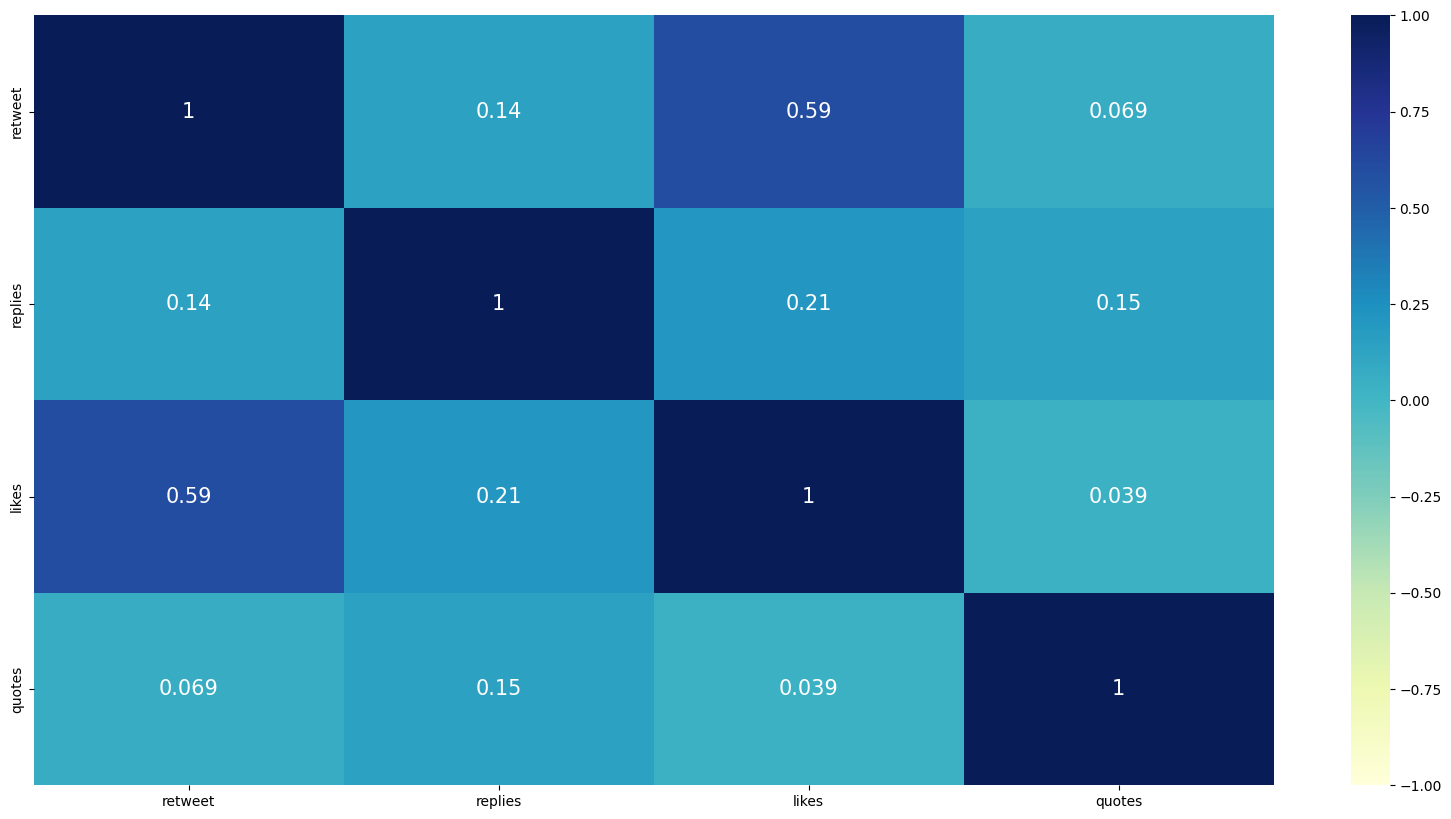

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_metricas.corr(),vmin=-1,
            vmax=1, annot=True, annot_kws={"fontsize":15},cmap="YlGnBu");



# 4. Utiliza un modelo pre entrenado

¿Cuáles son las predicciones? Interpreta los resultados.

In [ ]:
import pickle

In [ ]:
with open('finished_model.model', "rb") as archivo_entrada:
    pipeline_importada = pickle.load(archivo_entrada)

In [ ]:
Dataframe_completo['Text']

0      Terminando el desafio de tripulaciones en @The...
1      "El libro de la inteligencia colectiva"  https...
2      Jaime, estoy seguro de que en @TheBridge_Tech ...
3      Ciclo de Conferencias sobre Inteligencia Artif...
4      Este jueves nos vemos en @TheBridge_Tech para ...
                             ...                        
97     📰@UniversiaES, @IndraCompany i @TheBridge_Tech...
98     @TheBridge_Tech @ikerarceseco Hola Iker, quisi...
99     Hoy tenemos reto de tripulaciones @TheBridge_T...
100    @cbusquets Hola, @TheBridge_Tech te da la opci...
101    ¿Quieres formarte en una de las profesiones qu...
Name: Text, Length: 102, dtype: object

In [ ]:
predictions = pipeline_importada.predict(Dataframe_completo['Text'])
Dataframe_completo['Polarity'] = pd.Series(predictions)
Dataframe_completo

,Author_id,Fecha,Hora,Text,id_tweet,retweet,replies,likes,quotes,Author_name,Author_username,Repercusion_total,month,Polarity
0,1528649918306557952,2022-05-23,11:18:42,Terminando el desafio de tripulaciones en @The...,1528696920729956352,0,0,0,0,Nacho Esteban,nachooatm82,0,mayo,0
1,41545659,2022-05-23,08:15:36,"""El libro de la inteligencia colectiva"" https...",1528650844094271490,3,0,6,0,Mario Lopez de Avila,nodosenlared,9,mayo,1
2,41545659,2022-03-26,13:30:10,"Jaime, estoy seguro de que en @TheBridge_Tech ...",1507711509467734019,2,0,6,0,Mario Lopez de Avila,nodosenlared,8,marzo,1
3,41545659,2022-01-12,19:03:03,Ciclo de Conferencias sobre Inteligencia Artif...,1481340966866989063,1,0,6,0,Mario Lopez de Avila,nodosenlared,7,enero,1
4,4628161,2022-05-23,08:01:09,Este jueves nos vemos en @TheBridge_Tech para ...,1528647207594909696,0,0,1,1,Tíscar Lara,tiscar,2,mayo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,479678741,2022-01-25,12:04:30,"📰@UniversiaES, @IndraCompany i @TheBridge_Tech...",1485946677194371074,0,0,1,0,ACEC +,AssociacioACEC,1,enero,0
98,53319655,2022-01-24,13:02:28,"@TheBridge_Tech @ikerarceseco Hola Iker, quisi...",1485598878917439491,0,0,0,0,Randall Solano | #TechUniversidad,randallsolanook,0,enero,1
99,12085582,2022-01-21,09:47:17,Hoy tenemos reto de tripulaciones @TheBridge_T...,1484462596065574914,0,0,1,0,diegodl,diegodl,1,enero,0
100,10045342,2022-01-08,12:10:46,"@cbusquets Hola, @TheBridge_Tech te da la opci...",1479787660910768132,0,0,4,0,Carlos A. Marchena,cmarchena,4,enero,1


In [53]:
Dataframe_completo['Text'][2]

'Jaime, estoy seguro de que en @TheBridge_Tech , la aceleradora de talento digital líder en nuestro país, estarían encantados de ayudarte en la organización de ese Hackhaton. Al menos yo lo estoy 😉 https://t.co/60ybQN84qk'

In [ ]:
tweet_serie = pd.Series('El libro de la inteligencia colectiva"  https://t.co/tUyIEoFlP9 artículo de @tiscar sobre la presentación que del libro de @arey haremos esta semana en @TheBridge_Tech \nPlazas limitadas, inscripciones en https://t.co/Oht7sRlBPh https://t.co/wICvbVbVqi')

if tweet_serie is None:
    print("Args empty, the data are not enough to predict")
else:
    prediction = pipeline_importada.predict(tweet_serie)
    print(prediction)

[1]


In [ ]:
tweet_serie = pd.Series(str('Mañana es Jueves'))

if tweet_serie is None:
    print("Args empty, the data are not enough to predict")
else:
    prediction = pipeline_importada.predict(['Mañana es viernes'])
    
print(prediction[0])

0


In [ ]:
pandas = ['El libro de la inteligencia colectiva"  https://t.co/tUyIEoFlP9 artículo de @tiscar sobre la presentación que del libro de @arey haremos esta semana en @TheBridge_Tech \nPlazas limitadas, inscripciones en https://t.co/Oht7sRlBPh https://t.co/wICvbVbVqi']
predictions_1 = pipeline_importada.predict(pandas)
predictions_1

array([1])

> b. ¿Qué variables han podido influir más en las predicciones del modelo?
> c. ¿Cómo podrías mejorar el modelo?
> d. ¿Qué otras oportunidades se te ocurren donde se podrían aplicar otros modelos de ML?

# 5. Despliega el modelo (no en local, puedes elegir el proveedor), con un endpoint donde poder enviarle un cuerpo de texto y devuelva la predicción del sentimiento.